# Explore here

In [1]:
# Your code here

import pandas as pd

total_data = pd.read_csv("/workspaces/ml-web-app-ds/data/raw/ObesityDataSet_raw_and_data_sinthetic.csv")
total_data.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [2]:
print(total_data.shape)

(2111, 17)


In [3]:
# Check for missing values
missing_values = total_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [4]:
# Check for duplicates
duplicate_rows = total_data[total_data.duplicated()]
print("\nDuplicate Rows:\n", duplicate_rows)


Duplicate Rows:
       Age  Gender  Height  Weight       CALC FAVC  FCVC  NCP SCC SMOKE  CH2O  \
98   21.0  Female    1.52    42.0  Sometimes   no   3.0  1.0  no    no   1.0   
106  25.0  Female    1.57    55.0  Sometimes  yes   2.0  1.0  no    no   2.0   
174  21.0    Male    1.62    70.0  Sometimes  yes   2.0  1.0  no    no   3.0   
179  21.0    Male    1.62    70.0  Sometimes  yes   2.0  1.0  no    no   3.0   
184  21.0    Male    1.62    70.0  Sometimes  yes   2.0  1.0  no    no   3.0   
209  22.0  Female    1.69    65.0  Sometimes  yes   2.0  3.0  no    no   2.0   
309  16.0  Female    1.66    58.0         no   no   2.0  1.0  no    no   1.0   
460  18.0  Female    1.62    55.0         no  yes   2.0  3.0  no    no   1.0   
467  22.0    Male    1.74    75.0         no  yes   3.0  3.0  no    no   1.0   
496  18.0    Male    1.72    53.0  Sometimes  yes   2.0  3.0  no    no   2.0   
527  21.0  Female    1.52    42.0  Sometimes  yes   3.0  1.0  no    no   1.0   
659  21.0  Female    1

In [5]:
# Drop duplicates
total_data = total_data.drop_duplicates()
total_data.shape

(2087, 17)

In [6]:
total_data.dtypes

Age                               float64
Gender                             object
Height                            float64
Weight                            float64
CALC                               object
FAVC                               object
FCVC                              float64
NCP                               float64
SCC                                object
SMOKE                              object
CH2O                              float64
family_history_with_overweight     object
FAF                               float64
TUE                               float64
CAEC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [7]:
total_data['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

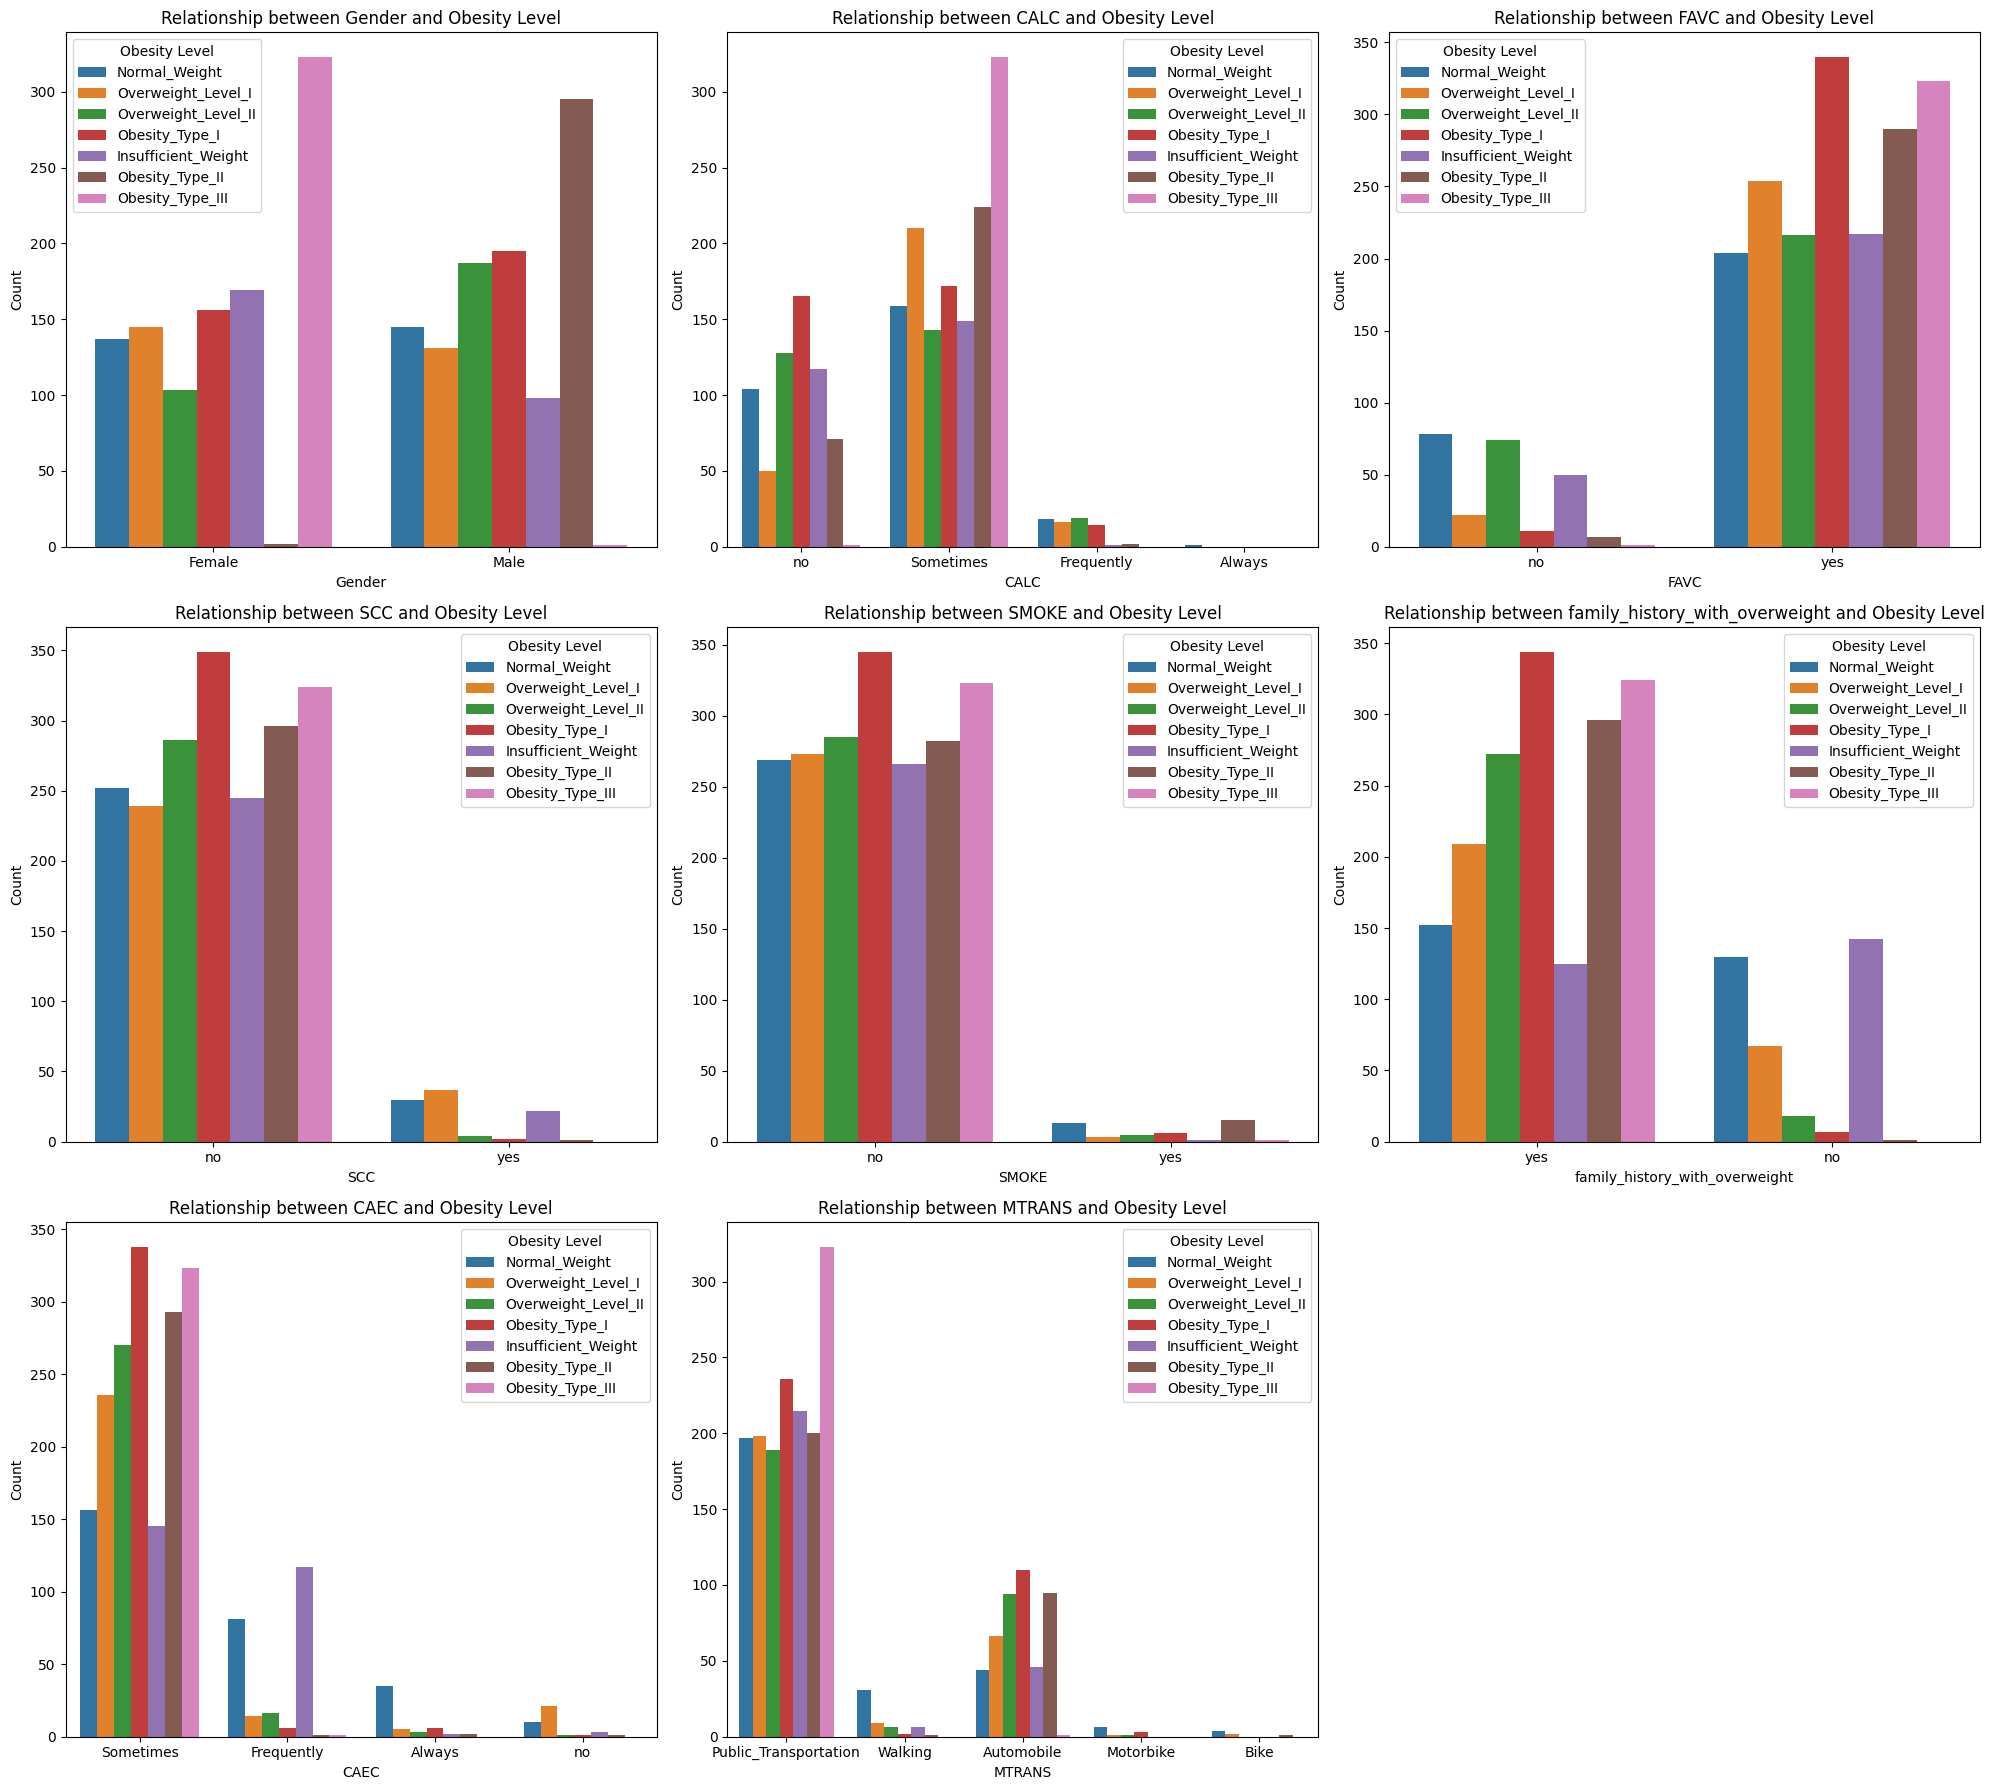

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the list of categorical variables
categorical_vars = ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS']

# Calculate the number of rows needed for the subplots
num_rows = (len(categorical_vars) + 2) // 3  # Round up to the nearest whole number

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(20, num_rows*6))  # 3 plots per row, adjust the figsize as needed

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create categorical plots for each variable against NObeyesdad
for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, hue='NObeyesdad', data=total_data, ax=axes[i])
    axes[i].set_title(f'Relationship between {var} and Obesity Level')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Obesity Level')

# Hide any unused subplots
for j in range(len(categorical_vars), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


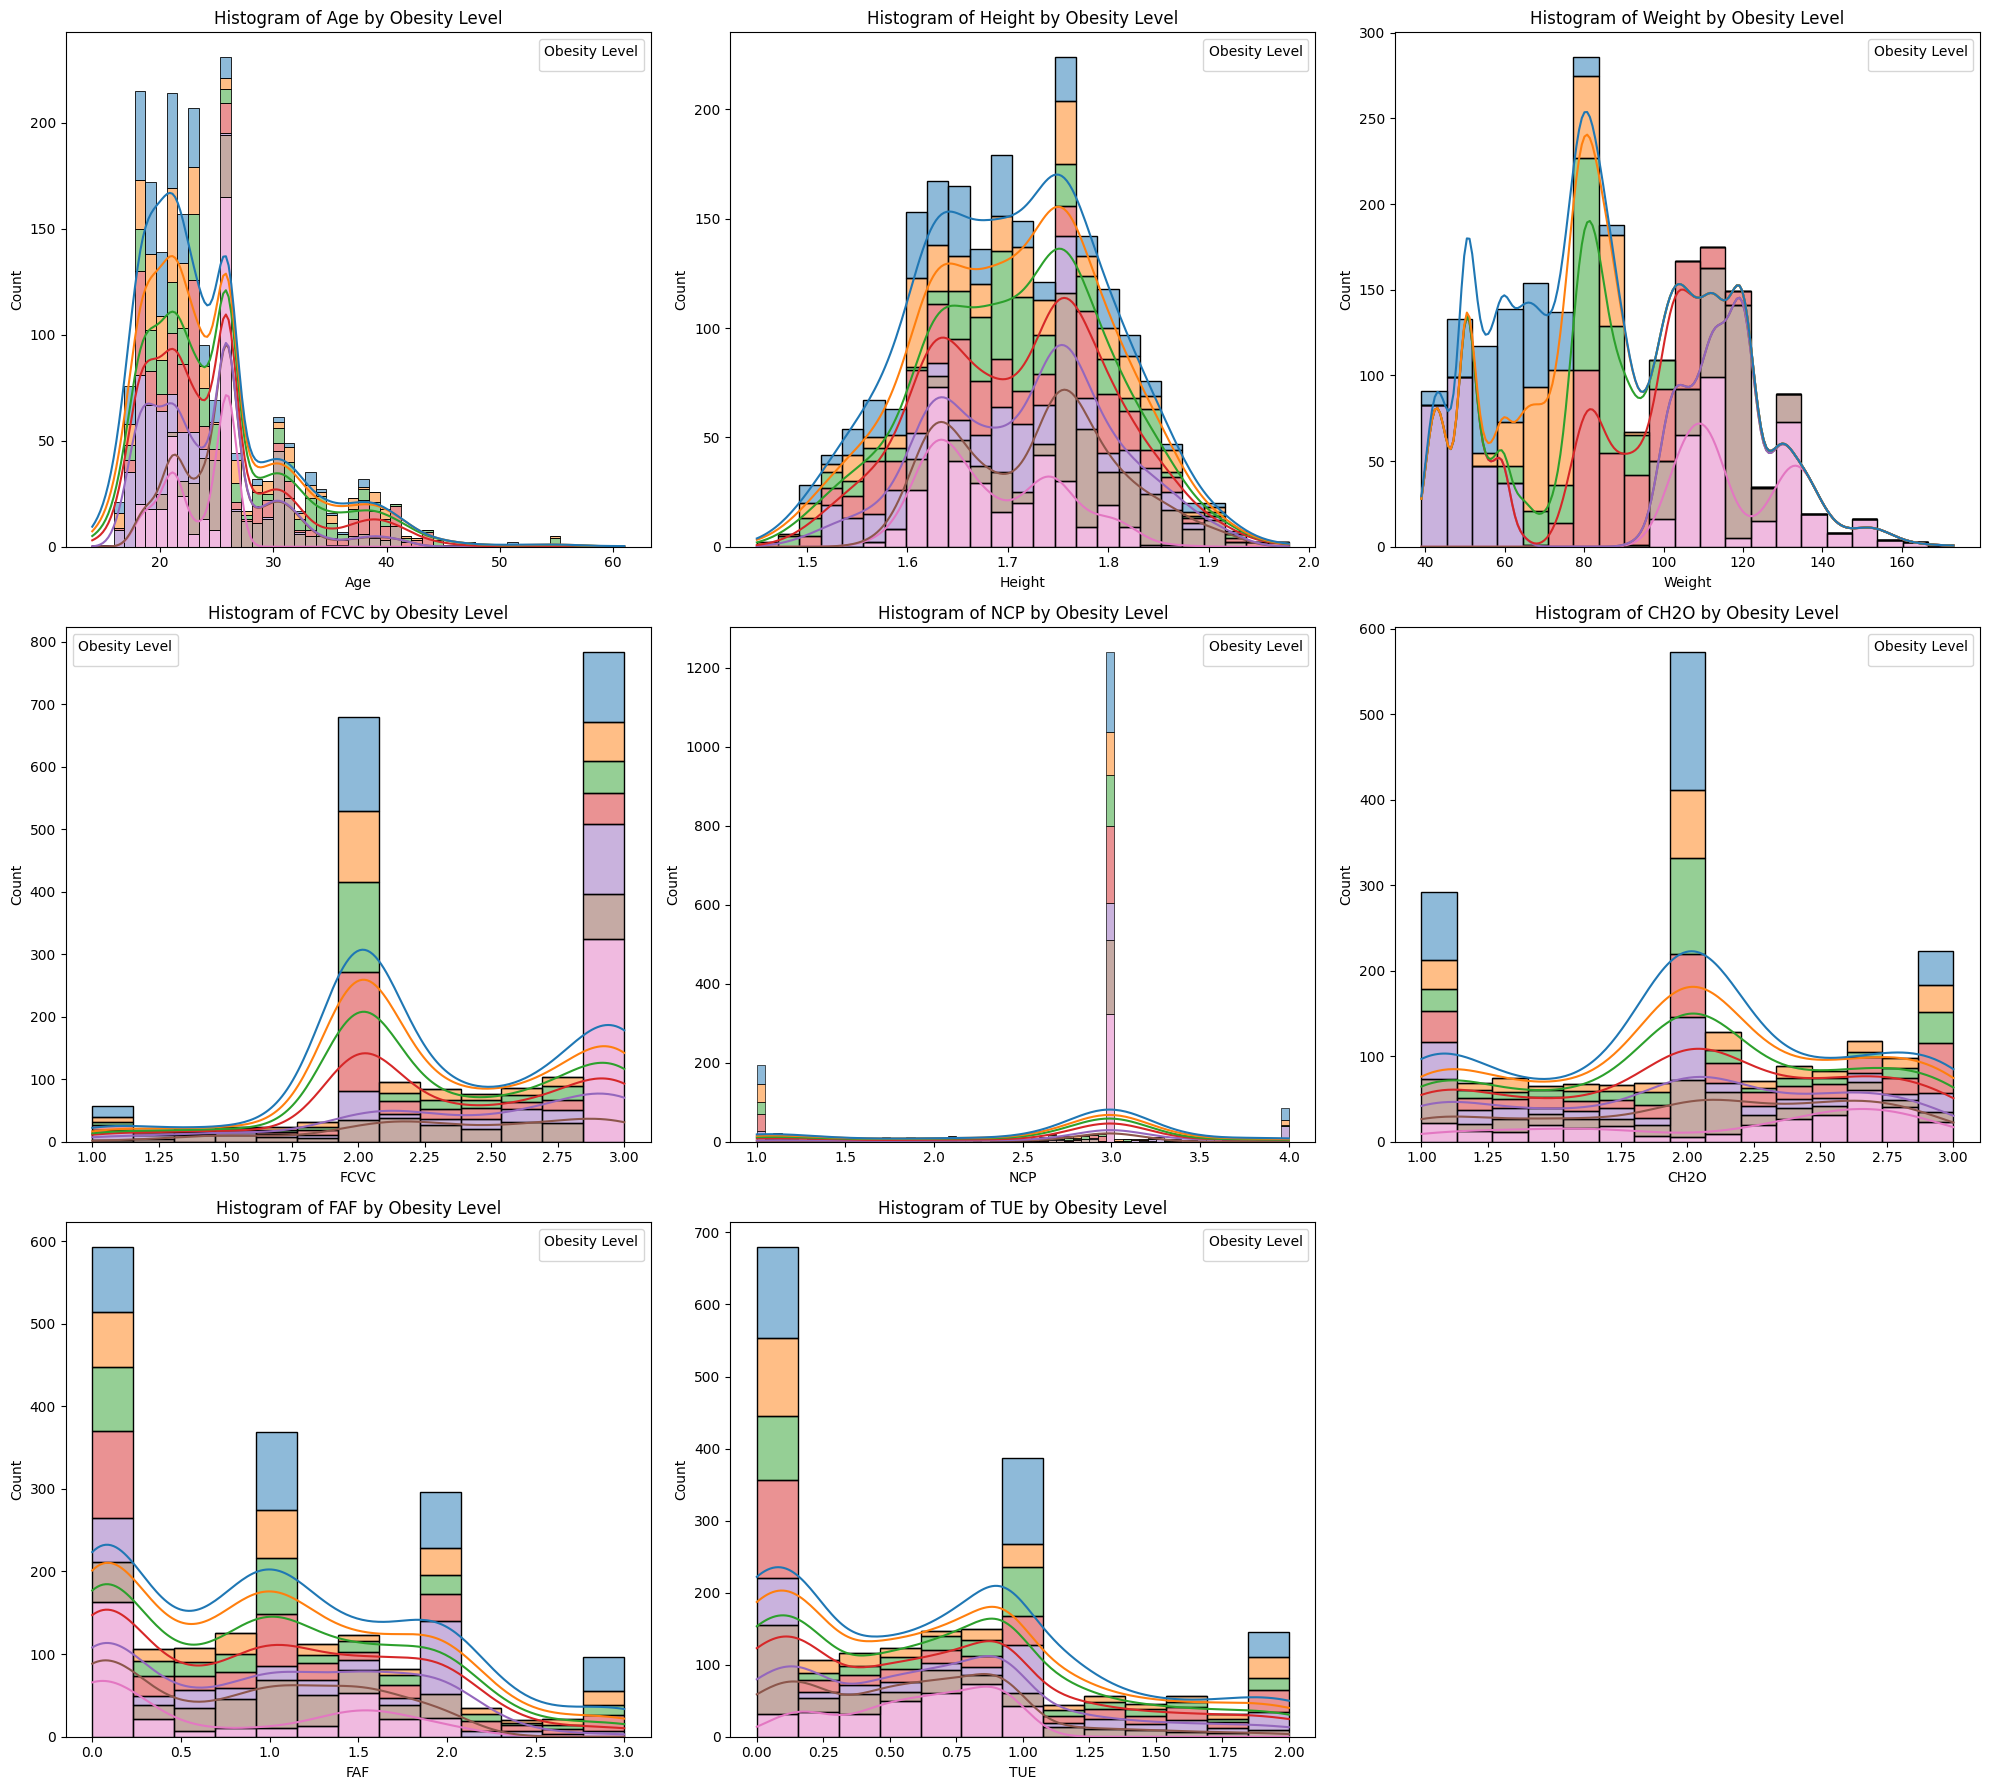

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the list of numerical variables
numeric_vars = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Calculate the number of rows needed for the subplots
num_rows = (len(numeric_vars) + 2) // 3  # Round up to the nearest whole number

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(20, num_rows*6))  # 3 plots per row, adjust the figsize as needed

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create histplots for each variable against NObeyesdad
for i, var in enumerate(numeric_vars):
    sns.histplot(data=total_data, x=var, hue='NObeyesdad', kde=True, multiple="stack", ax=axes[i])
    axes[i].set_title(f'Histogram of {var} by Obesity Level')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Obesity Level')

# Hide any unused subplots
for j in range(len(numeric_vars), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [10]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Iterate through each column in the DataFrame
for column in total_data.columns:
    if total_data[column].dtype == 'object':  # Check if the column contains categorical data
        total_data[column] = label_encoder.fit_transform(total_data[column])

Text(0.5, 1.0, 'Coorelation Graph')

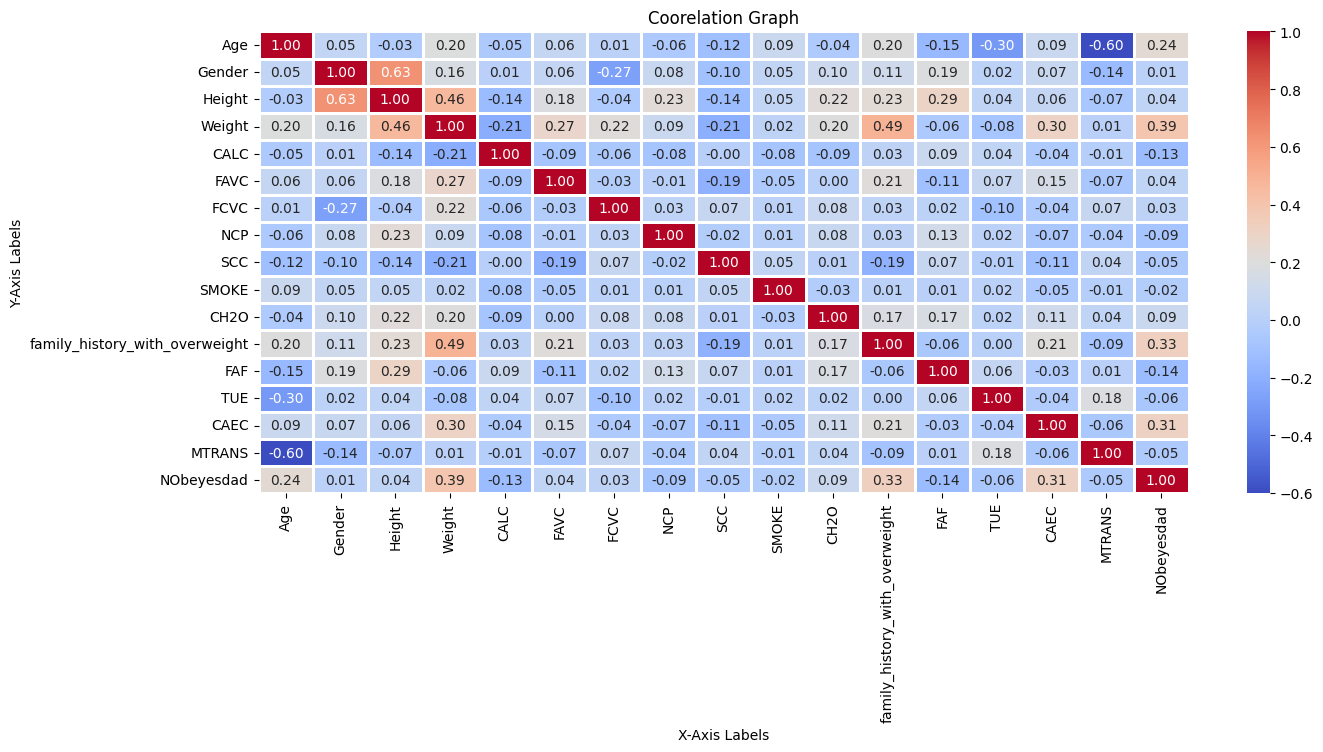

In [11]:
df1 =total_data
data = df1.corr()

plt.figure(figsize=(15, 6))  # Optional: Adjust figure size
sns.heatmap(data, annot=True, cmap='coolwarm', linewidths=2, fmt=".2f", annot_kws={"size": 10})

# Add labels and title (customize as needed)
plt.xlabel("X-Axis Labels")
plt.ylabel("Y-Axis Labels")
plt.title("Coorelation Graph")

In [12]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = total_data.drop(columns=['NObeyesdad'])  # Features
y = total_data['NObeyesdad']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (1669, 16) (1669,)
Testing set shape: (418, 16) (418,)


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest classifier
model_beta = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
model_beta.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred = model_beta.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9665071770334929
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.96        59
           1       0.87      0.97      0.91        61
           2       1.00      0.97      0.99        70
           3       1.00      1.00      1.00        64
           4       1.00      1.00      1.00        60
           5       0.98      0.91      0.94        55
           6       0.94      0.98      0.96        49

    accuracy                           0.97       418
   macro avg       0.97      0.97      0.97       418
weighted avg       0.97      0.97      0.97       418



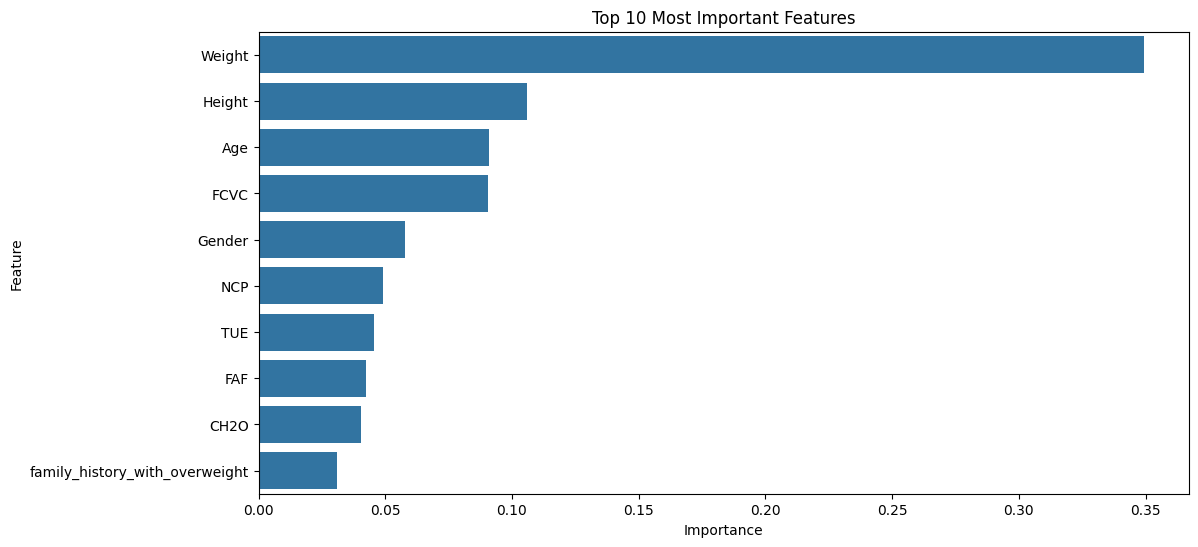

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained classifier
feature_importances = model_beta.feature_importances_

# Create a DataFrame to store feature importances along with their corresponding names
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [18]:
# Get the names of the top 6 most important features
top_6_features = feature_importance_df.head(6)['Feature']

# Print the names of the top 6 most important features
print("Top 6 Most Important Features:")
print(top_6_features)


Top 6 Most Important Features:
3    Weight
2    Height
0       Age
6      FCVC
1    Gender
7       NCP
Name: Feature, dtype: object


In [19]:
# Select only the top 6 most important features
X_train_top_6 = X_train[top_6_features]
X_test_top_6 = X_test[top_6_features]

# Initialize the Random Forest classifier with top 6 features
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data with top 6 features
model.fit(X_train_top_6, y_train)

# Predict the labels for the testing set with top 6 features
y_pred_top_6 = model.predict(X_test_top_6)

# Evaluate the classifier's performance with top 6 features
accuracy_top_6 = accuracy_score(y_test, y_pred_top_6)
print("Accuracy with Top 6 Features:", accuracy_top_6)

# Print classification report with top 6 features
print("Classification Report with Top 6 Features:")
print(classification_report(y_test, y_pred_top_6))


Accuracy with Top 6 Features: 0.9593301435406698
Classification Report with Top 6 Features:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        59
           1       0.95      0.90      0.92        61
           2       0.99      0.96      0.97        70
           3       1.00      1.00      1.00        64
           4       1.00      1.00      1.00        60
           5       0.94      0.91      0.93        55
           6       0.87      0.98      0.92        49

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418



In [20]:
import pickle

# Save the trained model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)